This notebook is based on OpenCV course at:
https://www.geo.university/courses/take/digital-image-processing-with-opencv-in-python

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
!pwd

/Users/sasingsi/Documents/GoogleDrive/DataScience/OpenCV-for-python


In [3]:
!ls

Filters-Sobel-Laplacians.png flowerpot.png
OpenCV-Primer.ipynb          kmeans1.png
OpenCV.docx                  kmeans2.png
basketball.png               lena.png
bike.png                     red.png
cropland.png                 streetview.png
cropped.png                  ~$OpenCV.docx


# Opening and Displaying

In [13]:
imgC = cv2.imread('bike.png',1) # 0: gray scale, 1: RBG

In [14]:
imgC.shape

(533, 800, 3)

In [21]:
imgC[0].shape # 1st Row Pixels in all 3 channels: First Axis is for rows, each index at first dimension is a row

(800, 3)

In [22]:
imgC[0:10].shape # Rows 1 to 10 pixels in all 3 channels.

(10, 800, 3)

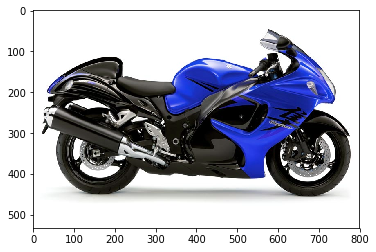

In [23]:
plt.imshow(imgC) # Full image display

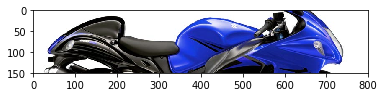

In [24]:
plt.imshow(imgC[100:250]) # Partial Image display

In [15]:
# Gray Scale Image
imgG = cv2.imread('bike.png',0)
imgG.shape # Only 1 channel for gray scale values

(533, 800)

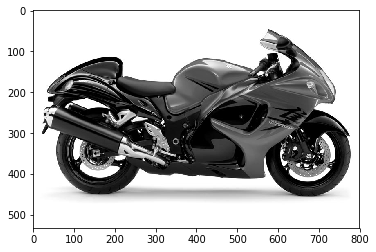

In [26]:
# Showing Gray scale values
plt.imshow(imgG, cmap="gray") # if you don't pass color map, then it is going to use default color maps in absence of other channels 

# Note that higher values towards 255 are white ones, while towards 0 are black ones. 

In [32]:
# Drawing Circle or any shape on Image
circle = cv2.circle(imgC,(100,200),100,(255,0,0),10)

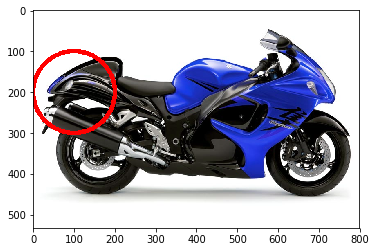

In [33]:
plt.imshow(circle)

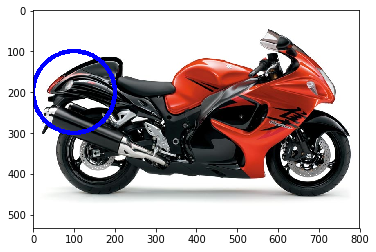

In [55]:
plt.imshow(cv2.cvtColor(imgC, cv2.COLOR_BGR2RGB))

In [16]:
# Splitting Channels and Map Algebra
b, g, r = cv2.split(imgC) # Note that openCV assumes all images are in BGR format and splits the accordingly.

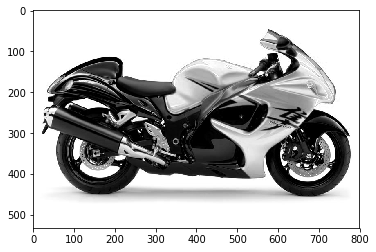

In [17]:
# Note that each of the splitted channel in like gray scale values array with just one channel.
plt.imshow(r,cmap='gray')

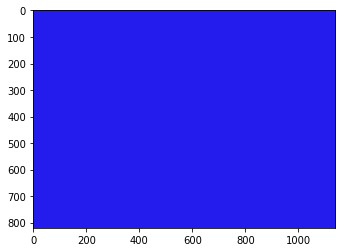

In [18]:
# Image interpration caution
# In below example, we have an red colored image 
redBGR = cv2.imread('red.png',1) # Read in BGR order

# Here, if we try to read display this image using plt.imhshow(), we will see blue image.
plt.imshow(redBGR) # Blue image is seen because plt.imshow() assumes RGB order, So, high R values are painted as high B's


In [19]:

# To avoid these channel switching, conver images read by openCV to RBG as:
plt.imshow(cv2.cvtColor(redC, cv2.COLOR_BGR2RGB)) # This displays red image as expected


NameError: name 'redC' is not defined

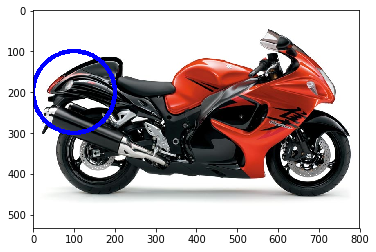

In [71]:
# Or as an alternate, splitted channels can be merged in desired order as:
# Merging Channels
plt.imshow(cv2.merge((r,g,b)))  # note that order of channels is merged as needed by imshow(), i.e. RGB

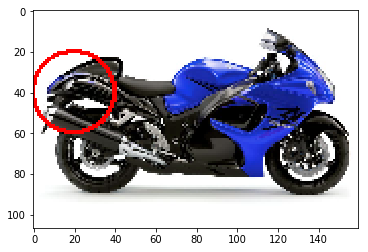

In [78]:
# Resizing Images
imageResized = cv2.resize(imgC, dsize=None,fx=0.2,fy=0.2,interpolation=cv2.INTER_CUBIC)
# Here, fx and fy are resizing ratios of respective axis; 
# interpolation is for caculating new pixel values as image size changes the number of pixels in image.
plt.imshow(imageResized)

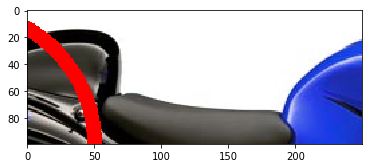

In [81]:
# Cropping Image
cropped = imgC[100:200,150:400] # Simple read the rows and columns to be included in crop
plt.imshow(cropped)

In [82]:
# Saving Image files
cv2.imwrite('cropped.png', cropped) # This will create new file cropped.png

True

# Geometric Operations on Image

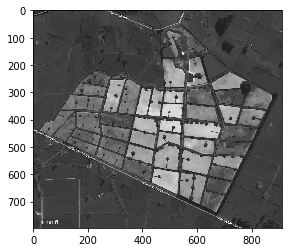

In [58]:
# Moving window in Convolution is called "Kernel or filter", which has different value of multiplying respective pixel values
# Specific sets of these kernels are called different names like Kalman filter etc.

crop = cv2.imread('cropland.png',0)
plt.imshow(crop,cmap='gray')

**Gradient** :
We can fine all the pixels, which are on the same gradient line in image using 2 different types of filters:

Filters-Sobel-Laplacians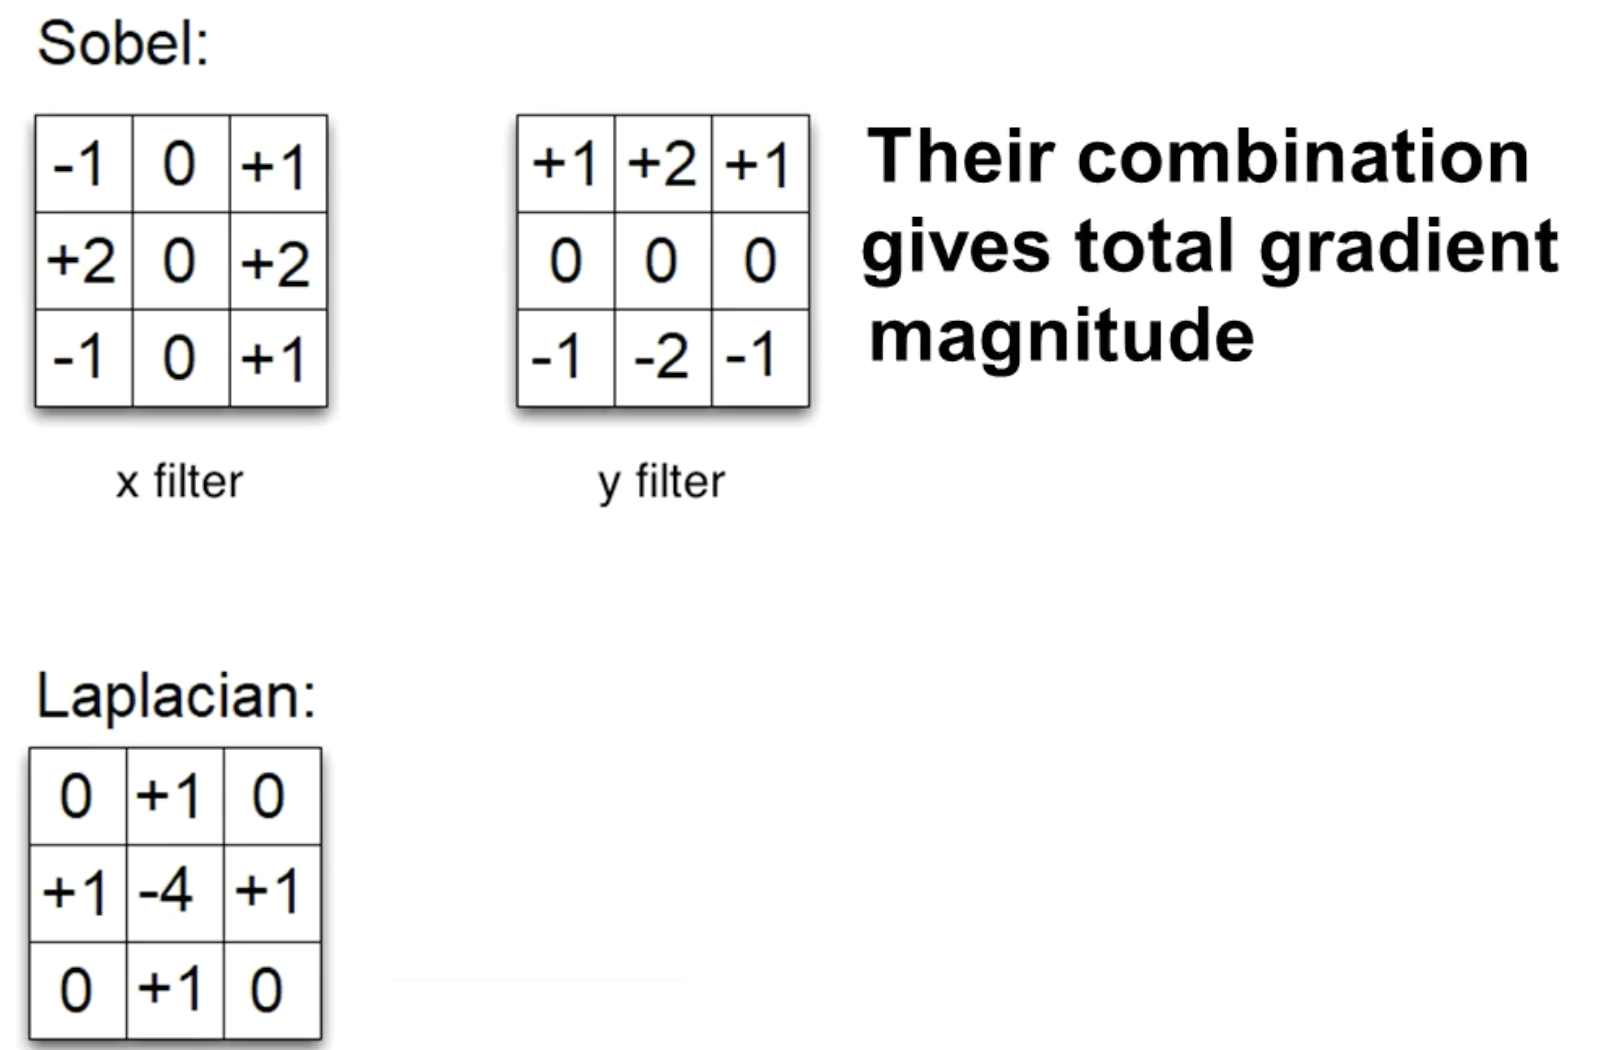


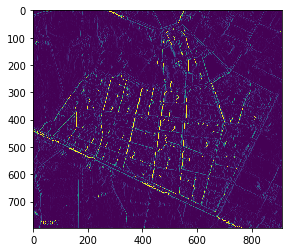

In [21]:
#Examples

#1 Sobel filter as:

# X-Axis Sobel gradients
sobelx = cv2.Sobel(crop, cv2.CV_8U,1,0,ksize=3) # 8bit unsigned , (1,0) for x-axis, kernel size 3
plt.imshow(sobelx)

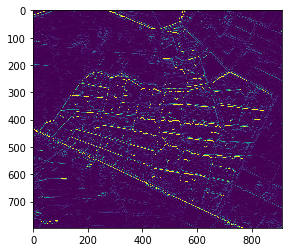

In [22]:
# Y-Axis Sobel gradients
sobely = cv2.Sobel(crop, cv2.CV_8U,0,1,ksize=3) # 8bit unsigned , (0,1) for y-axis, kernel size 3
plt.imshow(sobely)

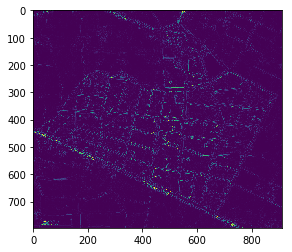

In [23]:
# Laplacian gradient
laplacian = cv2.Laplacian(crop,cv2.CV_8U)
plt.imshow(laplacian)

**So, depending on the which gradient is having most useful result for you images, can be used at that time!**

**Edge Detection with Canny Operator**

We can detect edges of any image's content by using Canny operators very easily. This is done after converting image into single channel gray scale images. 

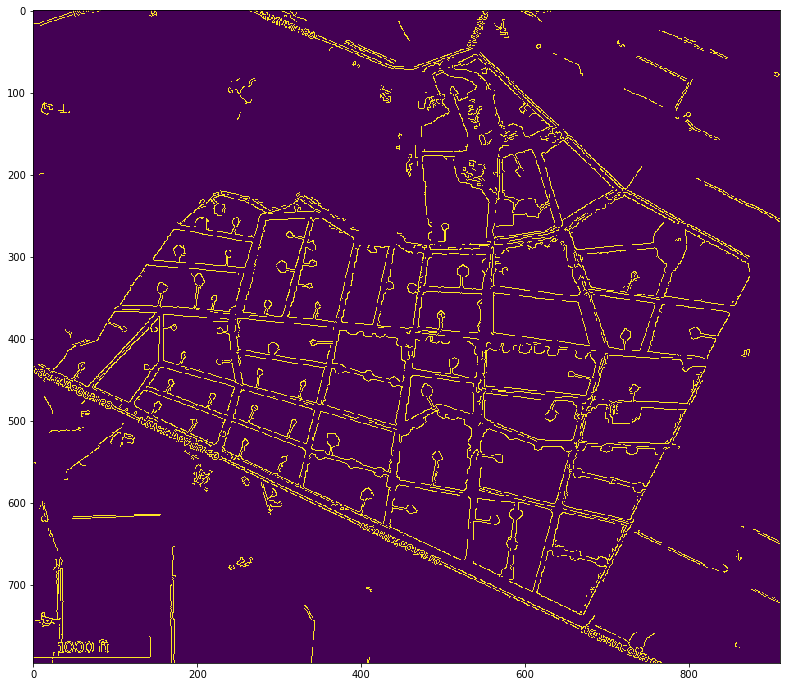

In [35]:
# Canny operator for edge detection as:
edges = cv2.Canny(crop,100,200) # This basically gives us image data of same shape with edges only
plt.figure(figsize = (16,12))
plt.imshow(edges)

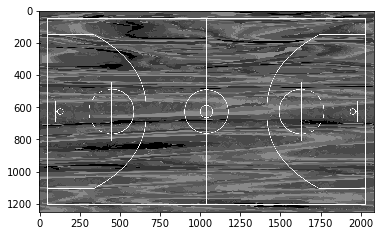

In [59]:

bbal = cv2.imread('basketball.png',0)
plt.imshow(bbal,cmap='gray')


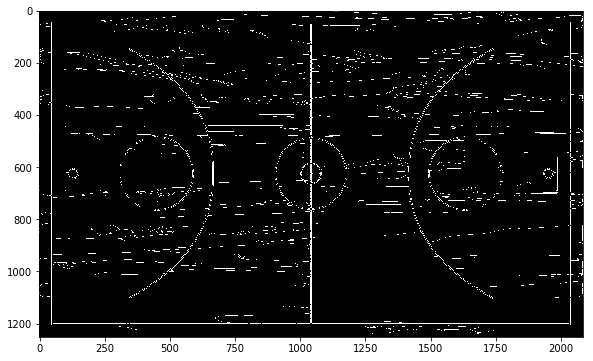

In [63]:
# Canny operator for edge detection as:
edges_bbal = cv2.Canny(bbal,50,200) # This basically gives us image data of same shape with edges only
plt.figure(figsize = (18,6))
plt.imshow(edges_bbal,cmap='gray')

In [78]:
lines_bbal = cv2.HoughLines(edges_bbal,1,np.pi/180,500) # Returns the list of 

In [79]:
lines_bbal.shape

(18, 1, 2)

In [80]:
lines[:5]

array([[[  52.       ,    1.5707964]],

       [[  45.       ,    1.5707964]],

       [[1199.       ,    1.5707964]],

       [[1206.       ,    1.5707964]],

       [[  47.       ,    0.       ]]], dtype=float32)

In [81]:
for iterator in lines_bbal:
    rho = iterator[0][0]
    theta= iterator[0][1]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0+1000*(-b))
    y2=int(y0+1000*(a))
    cv2.line(edges_bbal,(x1,y1),(x2,y2),(0,0,255),2)

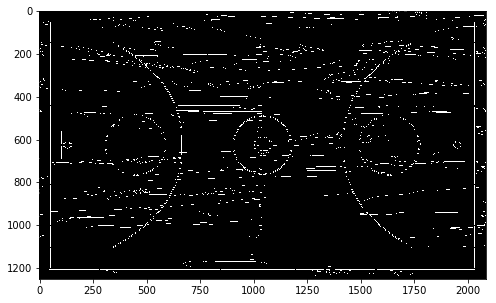

In [83]:
plt.figure(figsize=(8,6))
plt.imshow(edges_bbal,cmap='gray')

# Radiometric Operations on the Images

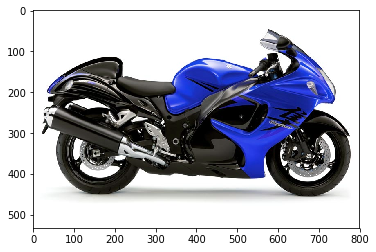

In [85]:
plt.imshow(imgC) # Original

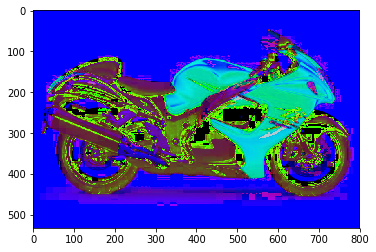

In [90]:
# Converting colorspace of image 
hsv = cv2.cvtColor(imgC,cv2.COLOR_BGR2HSV)
plt.imshow(hsv) #HSV

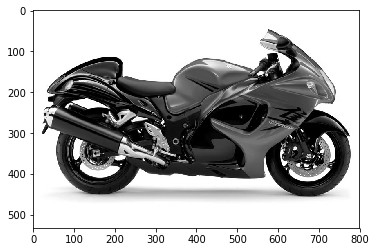

In [92]:
gray = cv2.cvtColor(imgC,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [101]:
# Converting Gray Scale Image to B&W Image using Threshold
r,t=cv2.threshold(gray,175,255,cv2.THRESH_BINARY)

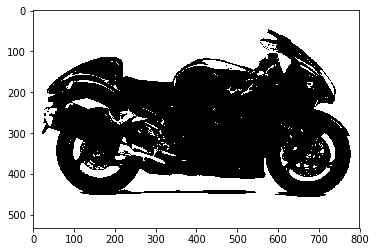

In [102]:
plt.imshow(t,cmap='gray')

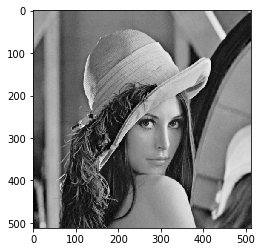

In [106]:
# Image Histogram extraction and manipulation
lena = cv2.imread('lena.png',0)
plt.imshow(lena,cmap='gray')

In [109]:
# Calculate historgram: It is nothing but a frequency of each intensity value in image.
hist = cv2.calcHist([lena],[0], None, [256],[0,256])

<function matplotlib.pyplot.show(*args, **kw)>

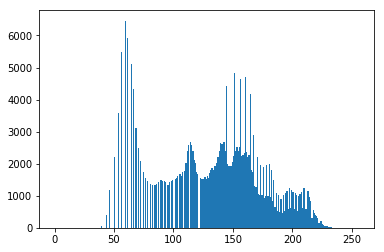

In [110]:
plt.hist(lena.flatten(),256,[0,256])
plt.show

In [114]:
# As we can see above, most of the values are centered in whole spectogram. 
# This causes less contrast, which can be fixed by moving black's towards more black and white towards more white.
# By equalizeing thre histogram as:
equ = cv2.equalizeHist(lena)

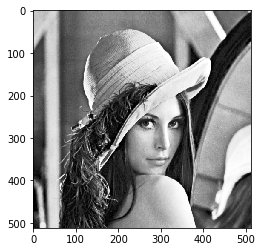

In [115]:
plt.imshow(equ,cmap='gray')

<function matplotlib.pyplot.show(*args, **kw)>

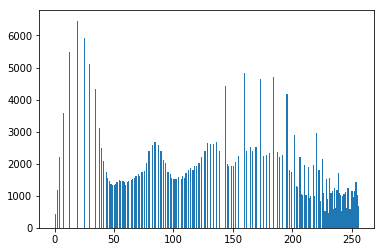

In [116]:
plt.hist(equ.flatten(),256,[0,256])
plt.show

As we can see above histogram is more scatter towards end values by equalization and Image looks bit better.

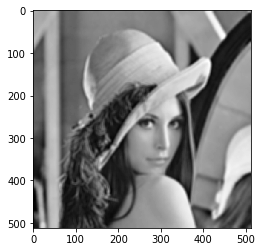

In [119]:
# Convolution Based : Enhancing Image or Reducing Noise
# Blur or De-noising is done by calculating any pixel value from its neighbors. 
# Calculated value depends on the type of kernel or filter used.

# Regular Blur
blur = cv2.blur(lena,(7,7)) # 7x7 kernal for avg pooling
plt.imshow(blur,cmap='gray')

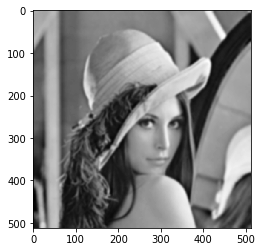

In [121]:
# Gaussian Blur
blurG = cv2.GaussianBlur(lena,(11,11),0) # 11x11 kernal for avg pooling
plt.imshow(blurG,cmap='gray')

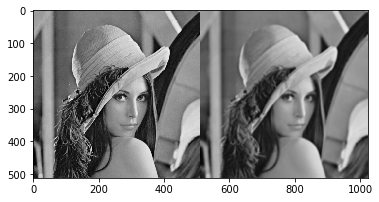

In [125]:
# Show side by side
plt.imshow(np.hstack((lena,blurG)),cmap='gray')

### Converting any Image into K-Means encoded image. 

This is sort of segmentation, where each pixel gets a catagory

kmeans1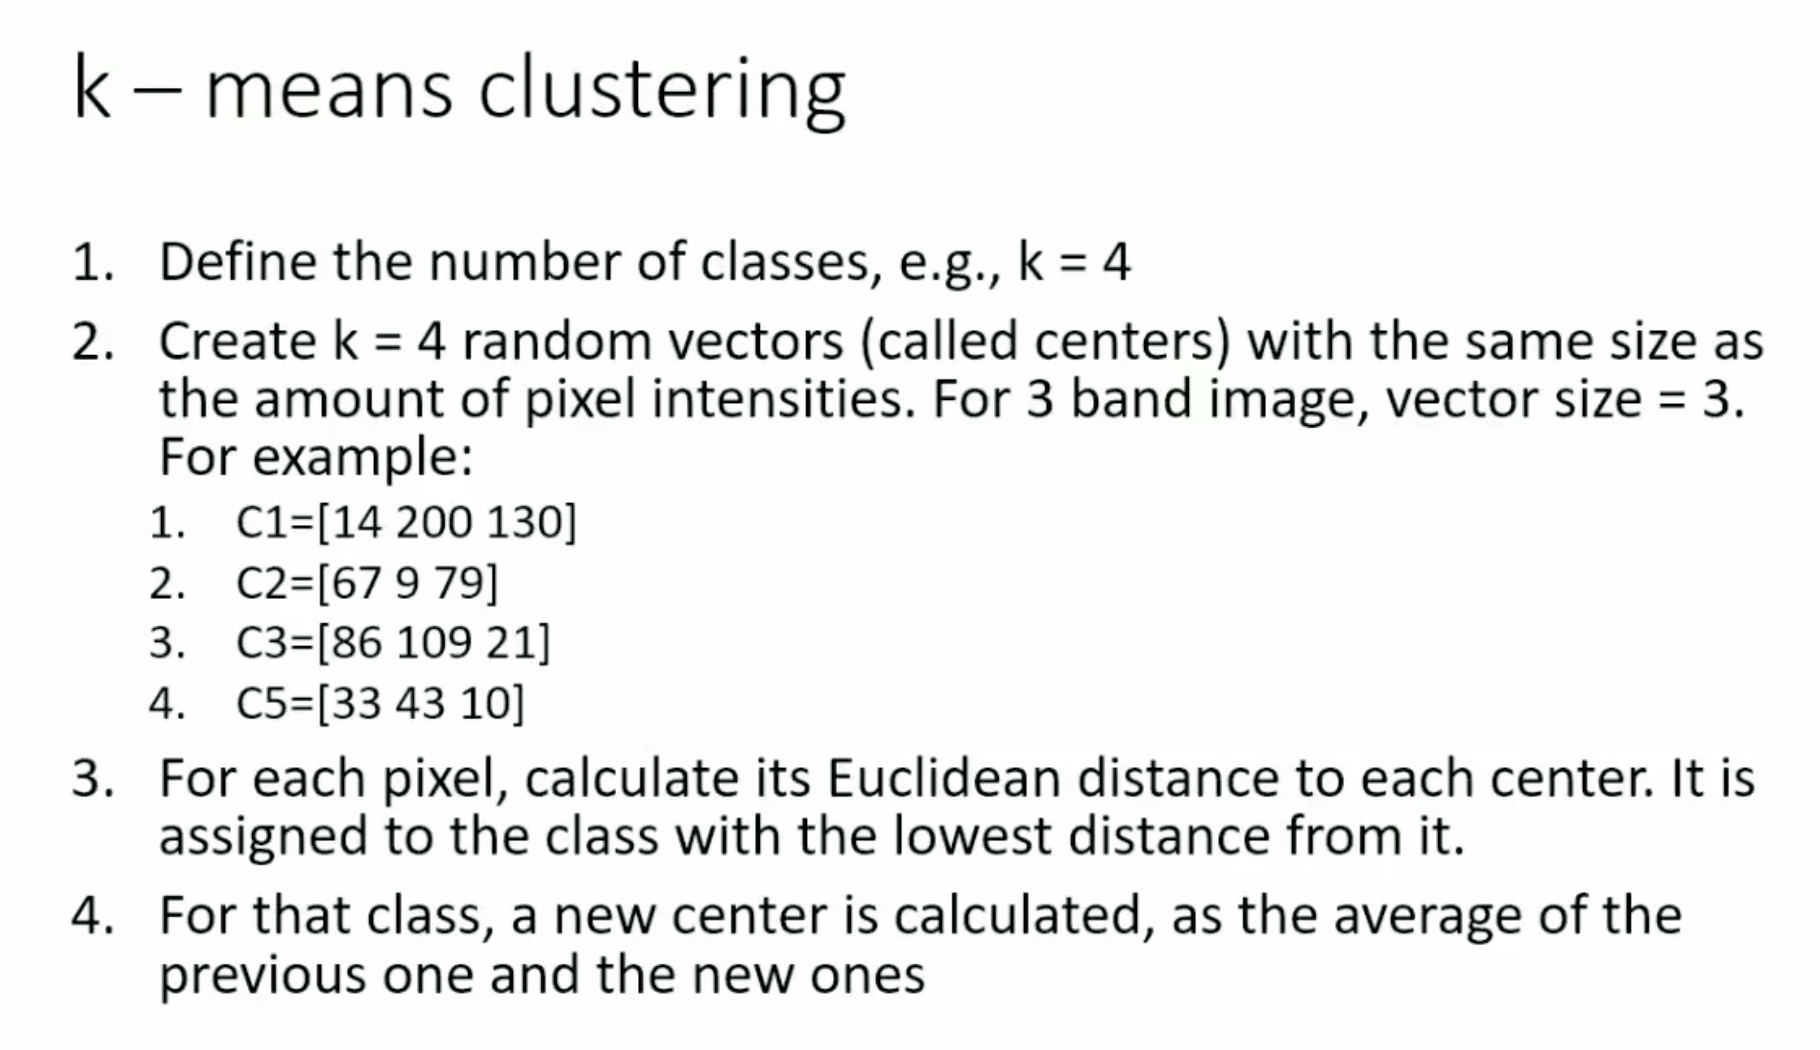


kmeans2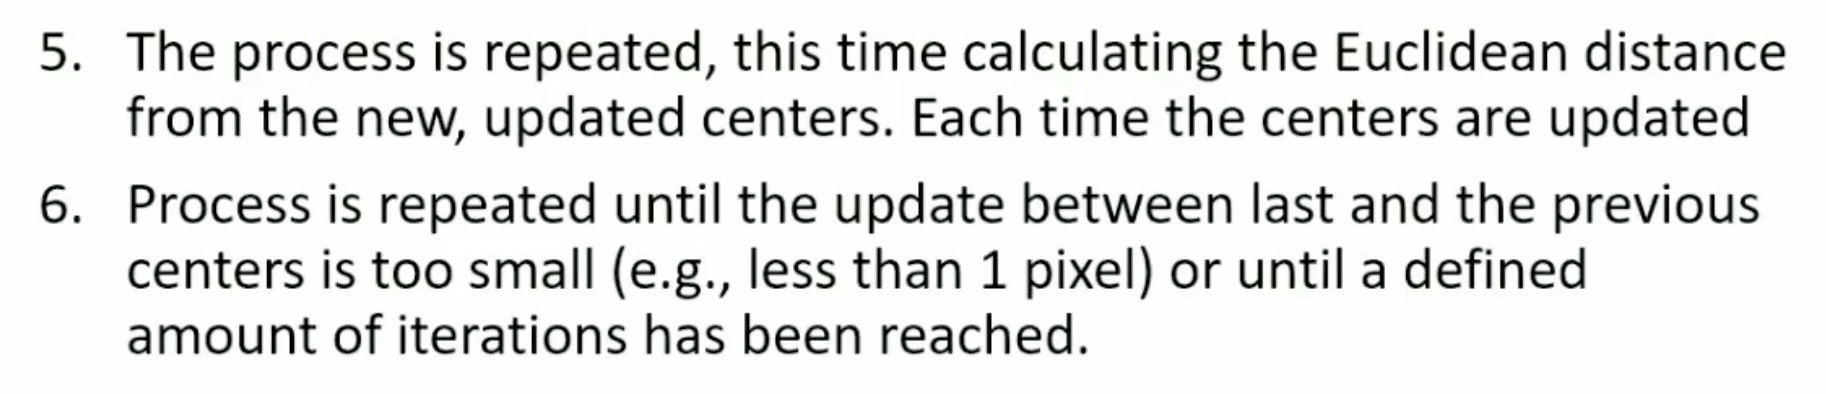

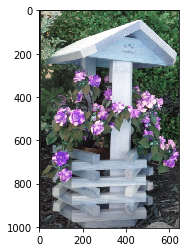

In [166]:
# Converting any Image into K-Means encoded image. 
# This is sort of segmentation, where each pixel gets a catagory

img = cv2.imread('flowerpot.png',1)
plt.imshow(img)

In [167]:
imgCL = np.float32(img.reshape((-1,3)))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,150,1.0)
K = 3 # number of segments to detect or classes in k-means
ret, label, center = cv2.kmeans(imgCL,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [171]:
print(label[:10])
label.shape

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


(648584, 1)

In [181]:
center

array([[196.69418 , 199.05864 , 217.64893 ],
       [ 52.475742,  64.20786 ,  54.47119 ],
       [124.63475 , 128.34706 , 143.23935 ]], dtype=float32)

In [175]:
label.flatten()

array([1, 1, 1, ..., 1, 2, 2], dtype=int32)

In [182]:
# Technique to select multiple rows many tines from the array
center[[0,1,2,1,2,1,1]] # Multiple Selection from the array

array([[196.69418 , 199.05864 , 217.64893 ],
       [ 52.475742,  64.20786 ,  54.47119 ],
       [124.63475 , 128.34706 , 143.23935 ],
       [ 52.475742,  64.20786 ,  54.47119 ],
       [124.63475 , 128.34706 , 143.23935 ],
       [ 52.475742,  64.20786 ,  54.47119 ],
       [ 52.475742,  64.20786 ,  54.47119 ]], dtype=float32)

In [188]:
# We have already found 4 center vectors after doing k-means 
# Now we will encode images every pixel as one of these center vectors
center = np.uint8(center) # Image arrays are to be of unsigned Int type
res = center[label.flatten()] # Assumes each label corresponds to each center vector, and create res array having 1 vector for each label of pixel

In [189]:
# Discovered 3 Kmeans centers
center 

array([[196, 199, 217],
       [ 52,  64,  54],
       [124, 128, 143]], dtype=uint8)

In [193]:
# List of all the pixel vectors as 2 dimensional array
res.shape

(648584, 3)

In [194]:
img.shape # required image shape

(1004, 646, 3)

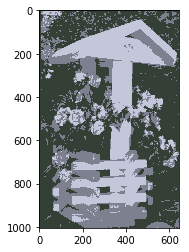

In [195]:
res2 = res.reshape(img.shape) # Convert 2-d array to 3-channel image format
plt.imshow(res2)

In the image above, we have reduced or classified each pixel to be one of 3 kmeans classes. 

# Example : GIS Eartch Observation/Change Application 

Develope an application which can detect the burned area by using before and after settelite images. 

- Note that Image data can be or multiple channels, e.g. 7 channel or etc. we can handle them as:
- Crop the image if source images are too big. 
- Proprocess the image data by using cv2.equalizeHist(), Convert them to np.float32() to each the classification.
- Use cv2.merge() to create image with multiple channels, if each channel is provided as seprate file. 
- Use KNN to reduce it down to 3 channel data which cv2 can read.
- Do this same for before and after images. 
- Perform comparison on these before and after images. 

Details of all these steps are as below:

In [ ]:
# Crop the image if source images are too big.
pathB="C:/users/Documents/1OpenCV-course/code/before"
pathA="C:/users/Documents/1OpenCV-course/code/after"

BEF = []
AFT = []
for i in range(1,8):
    BEF.append(cv2.imread(pathB+"B"+str(i)+".tif",0)[4200:4700,2900:3500]) # Crop to only pixels of interest
    AFT.append(cv2.imread(pathA+"A"+str(i)+".tif",0)[4200:4700,2900:3500]) # Crop to only pixels of interest

In [ ]:
# Proprocess the image data by using cv2.equalizeHist(), Convert them to np.float32() to each the classification.
# Use cv2.merge() to create image with multiple channels, if each channel is provided as seprate file.

BEF32 = []
AFT32 = []
for i in range (7):
   BEF32.append(np.float32(cv2.equalizeHist(BEF[i]))) 
   AFT32.append(np.float32(cv2.equalizeHist(AFT[i]))) 

before = cv2.merge((BEF32[0],BEF32[1],BEF32[2],BEF32[3],BEF32[4],BEF32[5],BEF32[6])) 
after = cv2.merge((AFT32[0],AFT32[1],AFT32[2],AFT32[3],AFT32[4],AFT32[5],AFT32[6])) 
# these before and after are equalized image with float 32 values as image data
# Do not try to open/voew this image as open cv is able to able only 4 channel image at max, where 4th channel is used for alpha.

In [ ]:
# Use KNN to reduce 7-channel, equalized before and after images down to 3 channel data which cv2 can read.
# Do this same for before and after images.

beforeReady = before.reshape((-1,7))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1)
ret,label,venter=cv2.kmeans(beforeReady,6,None,criteria,10,cv2.KMEANS_RANDON_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((before.shape))
beforeF=deepcopy(res2[:][:,:,:3]) # Choose most important 3 centers and use them as 3 image pixel's data


afterReady = after.reshape((-1,7))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,30,1)
ret,label,venter=cv2.kmeans(afterReady,6,None,criteria,10,cv2.KMEANS_RANDON_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((after.shape))
afterF=deepcopy(res2[:][:,:,:3]) # Choose most important 3 centers and use them as 3 image pixel's data

Perform comparison on these before and after images

Here we use the concept that in final beforeF and afterF:
particular images's pixel's RGB values sum can indicate if this was forest and it is burned in afterF image.
Screen Shot 2018-12-11 at 3.08.20 PM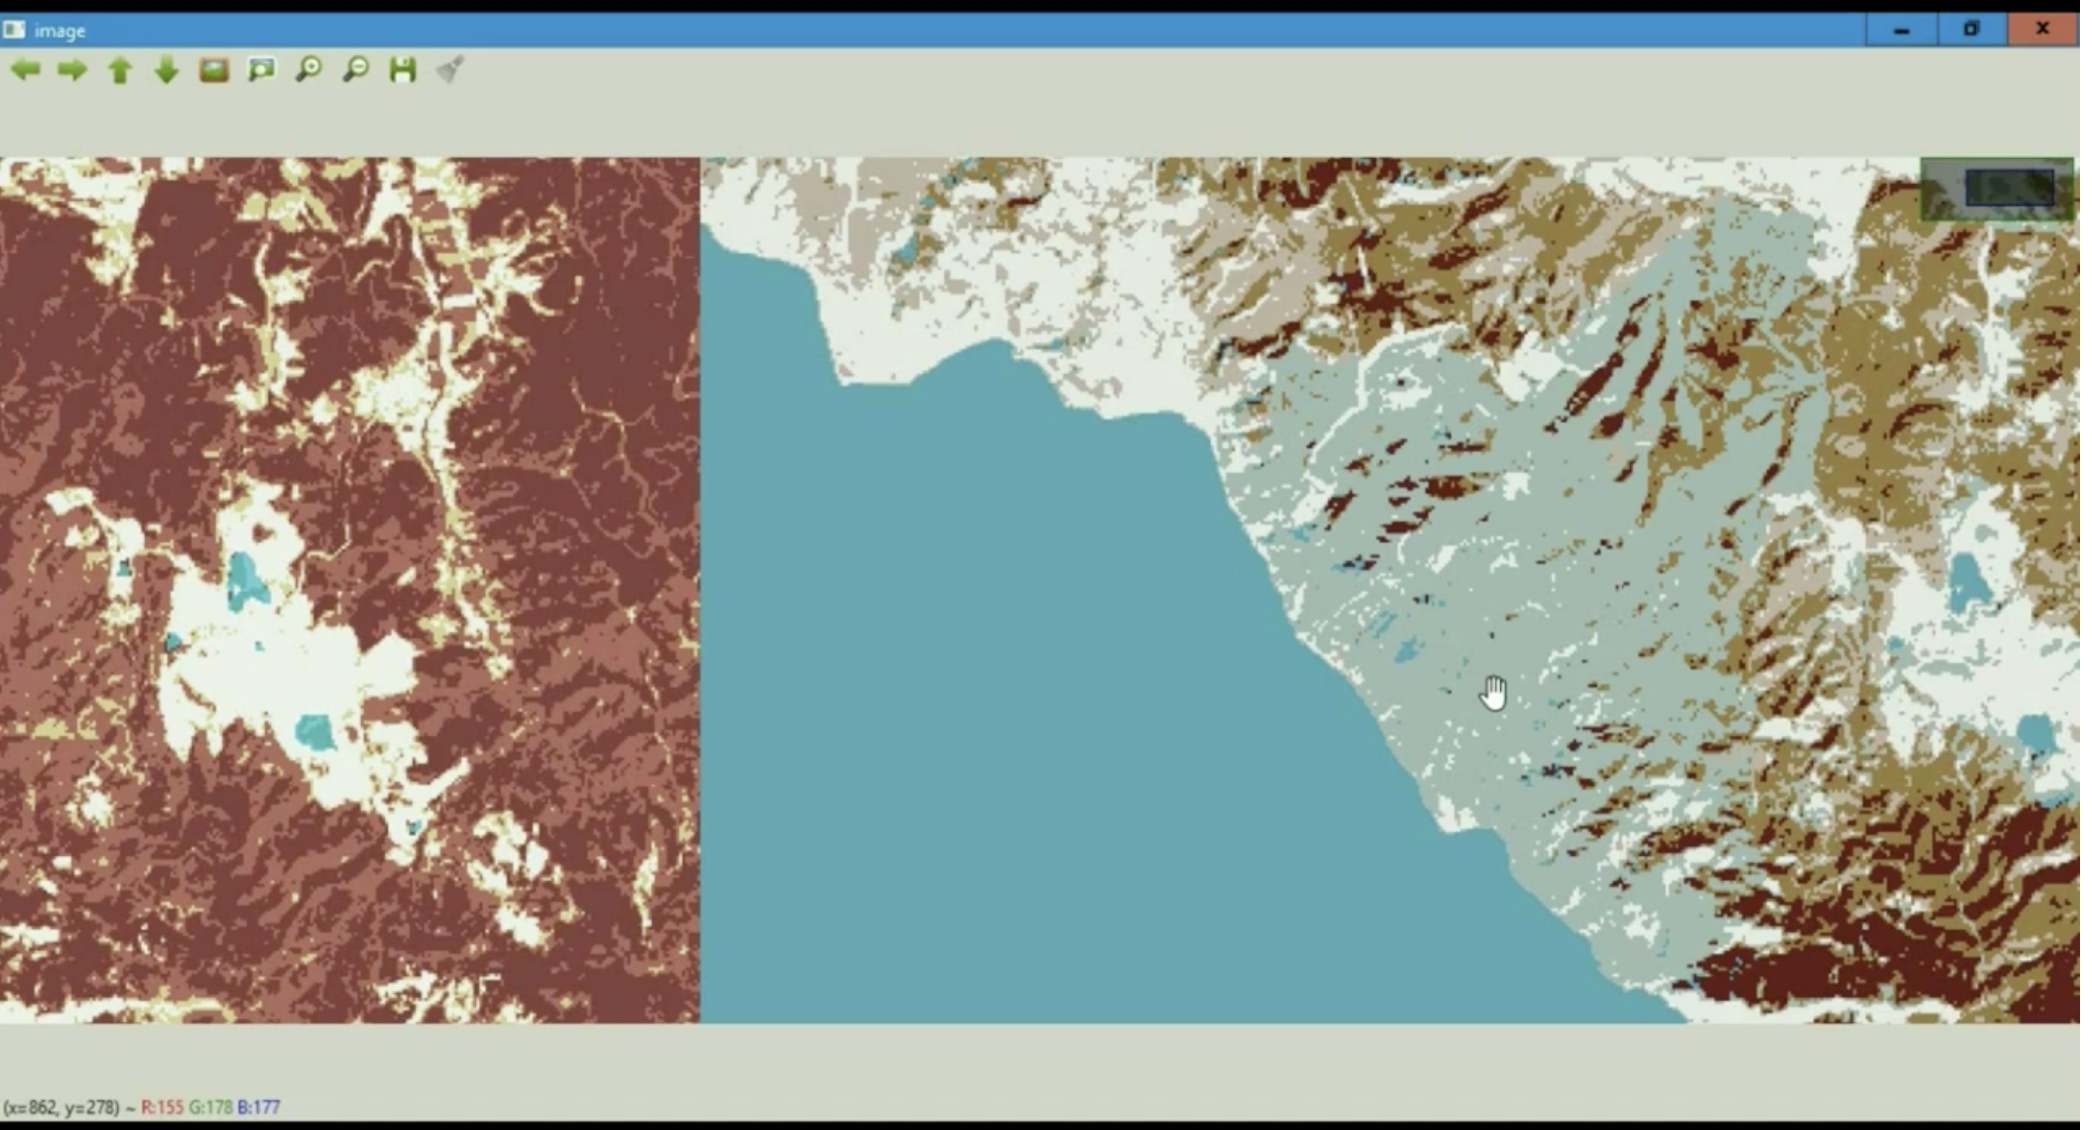


Also, note that each pixel is 30x30 meter of actual area.

In [ ]:
# Logic to find the burned area:
d=0;q=0 # Counters for burned pixels
for i in range(len(afterF[i])): # For each image
   for j in range(len(afterF[i])): # For each pixel in each image
      if(np.sum(afterF[I][j]) == 510: # If sum of pixel's RGB value is burned pixel value.
         d+=1
         if (np.sum(beforeF[I][j])==369 or np.sum(beforeF[I][j])==251): # Also, this burned pixel was forest before.
            q+=1

print("Total burned area: ", d*900, "square meters")
print("Forest burned area: ", q*900, "square meters")